# Creating the initial Graph

In [80]:
# import libraries
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

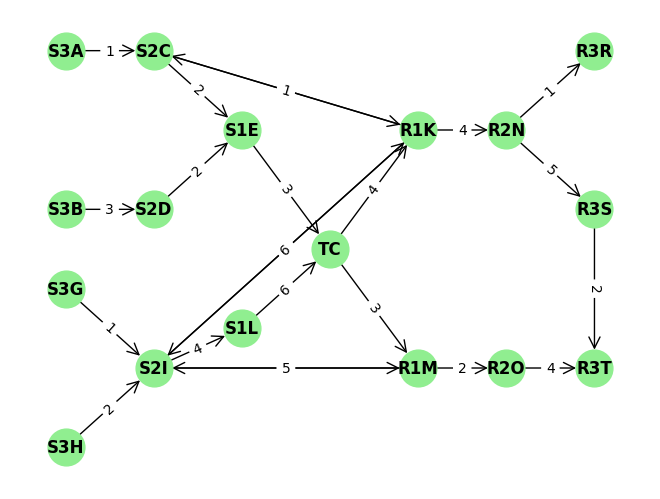

In [103]:
#Create initial Graph
G=nx.DiGraph()
# Add nodes
names = ['S3A','S3B','S3G','S3H','S2C','S2D','S2I','S1E','S1L','TC','R1K','R1M', 'R2N','R2O', 'R3R', 'R3S', 'R3T']
positions = [(1,-1),(1,-2),(1,-2.5),(1,-3.5),(2,-1),(2,-2),(2,-3),(3,-1.5),(3,-2.75),(4,-2.25),(5,-1.5),(5,-3),(6,-1.5),(6,-3),(7,-1),(7,-2),(7,-3)]
for i in range(0,n) :
    G.add_node(names[i],pos=positions[i])
# Add edges
G.add_weighted_edges_from([('S3A','S2C',1),('S3B','S2D',3),('S3G',"S2I",1),("S3H",'S2I',2),
    ('S2C','R1K',1),('S2C','S1E',2),('S2D','S1E',2),('S2I','R1K',6),('S2I','S1L',4),('S2I','R1M',5),
    ('S1E','TC',3),('S1L','TC',6),('TC','R1K',4),('TC','R1M',3),
    ('R1K','S2C',1),('R1K','S2I',6),('R1K','R2N',4),('R1M','S2I',5),('R1M','R2O',2),
    ('R2N','R3R',1),('R2N','R3S',5),('R2O','R3T',4),('R3S','R3T',2)])
# Draw it
elabels = nx.get_edge_attributes(G,'weight') # {('S3A', 'S2C'): 1, ('S3B', 'S2D'): 3, ...
pos = nx.get_node_attributes(G,'pos') # {'S3A': (1, -1), 'S3B': (1, -2), 'S3G': ...

nx.draw(G, pos = pos, with_labels=True, node_size=700, node_color="lightgreen", font_size=12, font_weight="bold", arrowstyle="->", arrowsize=20)
nx.draw_networkx_edge_labels(G, pos, edge_labels=elabels)
plt.show() # plt.savefig("grid.png")

# Calculate the Forman-Ricci curvature of each edge

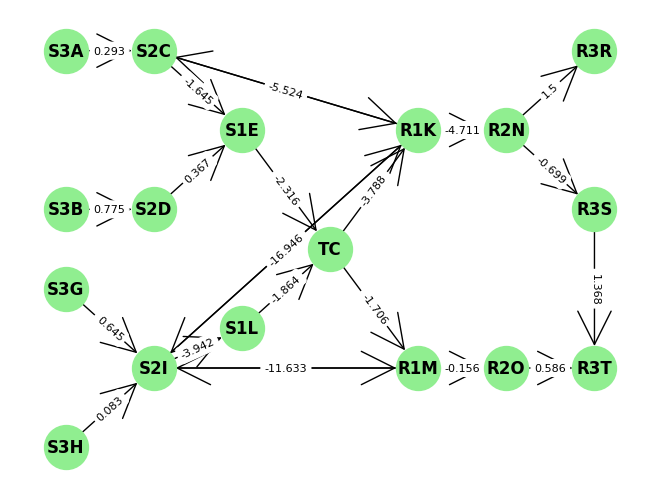

In [116]:
# get the edges
edWts = nx.get_edge_attributes(G,'weight')
formanRicci = {}
for ed in G.edges():
    # See calc at   https://doi.org/10.1016/j.chaos.2018.11.031
    v1 = ed[0]
    v2 = ed[1]
    #Assuming all vertex weights are 1 since unspecified
    wtv1 = 1.0
    wtv2 = 1.0
    we = edWts[ed] # weight of edge

    sumV1I = 0.0
    sumV2O = 0.0
    for v1pred in G.predecessors(v1):
        sumV1I += wtv1/np.sqrt(edWts[(v1pred,v1)] * we)
    for v2nxt in G.successors(v2):
        sumV2O += wtv2/np.sqrt(edWts[(v2,v2nxt)] * we)
    # check if bidirection, then would need to consider V1 out and V2 int as well
    if any(temp == v2 for temp in G.predecessors(v1)):
        for v1nxt in G.successors(v1):
            sumV1I += wtv1/np.sqrt(edWts[(v1,v1nxt)] * we)
        for v2pred in G.predecessors(v2):
            sumV2O += wtv2/np.sqrt(edWts[(v2pred,v2)] * we)
    formanRicci[ed] = np.round(we * (wtv1/we - sumV1I) + we * (wtv2/we - sumV2O), 3)

nx.draw(G, pos = pos, with_labels=True, node_size=1000, node_color="lightgreen", font_size=12, font_weight="bold", arrowstyle="->", arrowsize=60)
nx.draw_networkx_edge_labels(G, pos, edge_labels=formanRicci, font_size=8)
plt.savefig("FormanRicciGraph.png")
plt.show()